In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Logistic Regression

In [2]:
data = pd.read_csv("data_Logistic.csv")

In [3]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
# check missing data
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

## Processing Data

In [5]:
data['Gender'] = data['Gender'].map({'Male' : 1,'Female' : 0})

In [6]:
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


## Train test split

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(data.drop("Purchased",axis = 1),data['Purchased'],test_size=0.2,random_state=0)

## Train model

In [8]:
LogRegression = LogisticRegression()

In [9]:
LogRegression.fit(X_train,Y_train)

LogisticRegression()

In [10]:
Y_hat = LogRegression.predict(X_test)

## Evaluate model

In [11]:
LogRegression.score(X_test,Y_test)

0.825

In [12]:
from sklearn.metrics import confusion_matrix, classification_report

In [13]:
cm = confusion_matrix(Y_test,Y_hat)

In [14]:
cm

array([[56,  2],
       [12, 10]], dtype=int64)

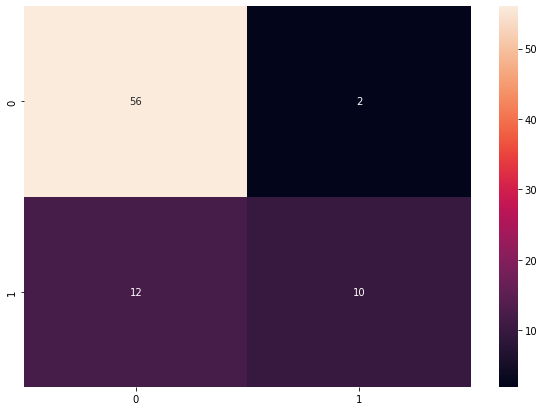

In [15]:
import seaborn as sn
dataFrame_cm = pd.DataFrame(cm)
plt.figure(figsize = (10,7))
sn.heatmap(dataFrame_cm, annot=True);

In [16]:
print("\n",classification_report(Y_test,Y_hat))


               precision    recall  f1-score   support

           0       0.82      0.97      0.89        58
           1       0.83      0.45      0.59        22

    accuracy                           0.82        80
   macro avg       0.83      0.71      0.74        80
weighted avg       0.83      0.82      0.81        80

